In [1]:
import numpy as np
import matplotlib.pyplot as plt

name_str='input400sample{}.npz'
sample_list = np.arange(50,150,10)
std_w_range = np.arange(0.001,0.4,0.06)
axis_std_w1 = np.arange(0, 1, 0.1)
axis_std_w2 = np.arange(0, 1, 0.1)
std_w1_axis, std_w2_axis = np.meshgrid(axis_std_w1,axis_std_w2)
accuracy_10_samples = np.zeros((10,10,10))


0.99609375
1.0
1.0
1.0
1.0
0.99609375
1.0
1.0
1.0
0.984375


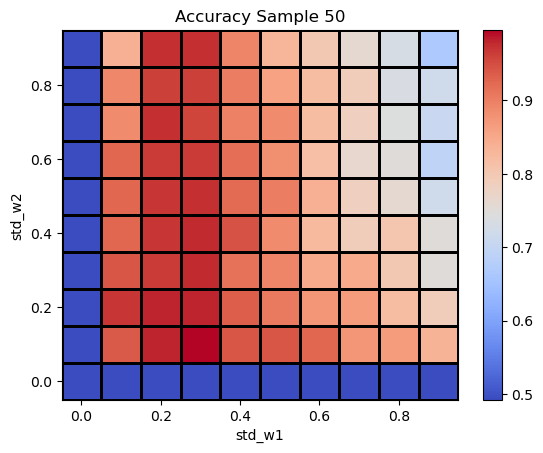

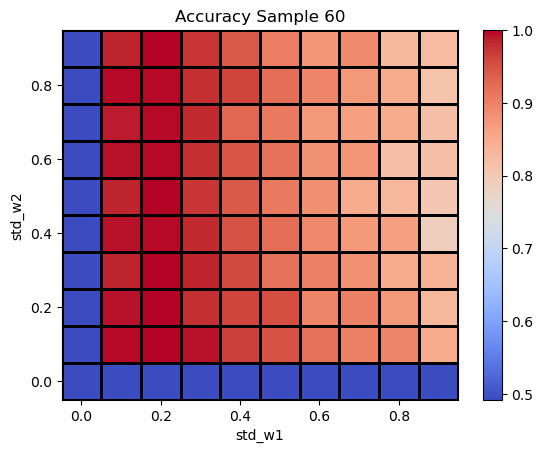

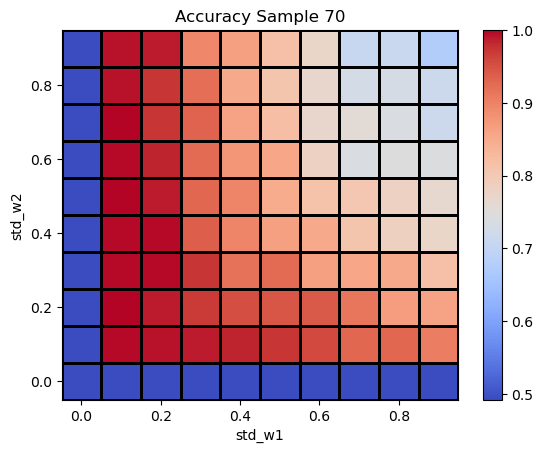

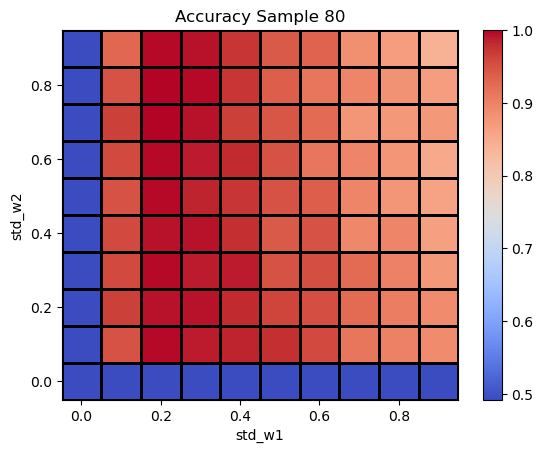

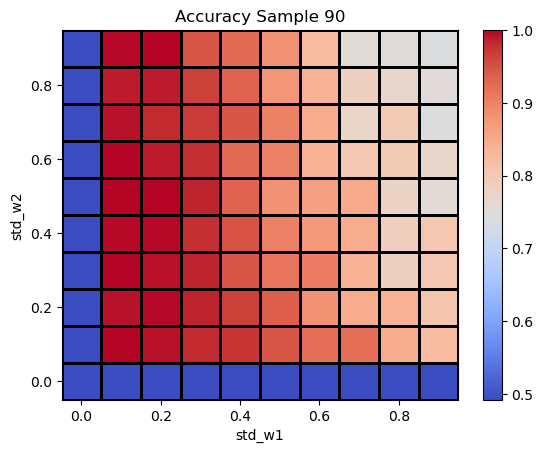

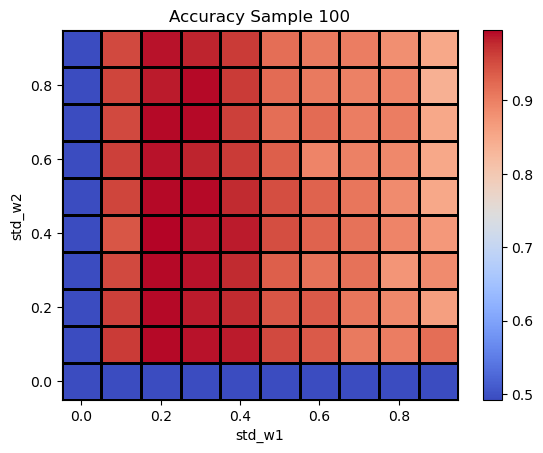

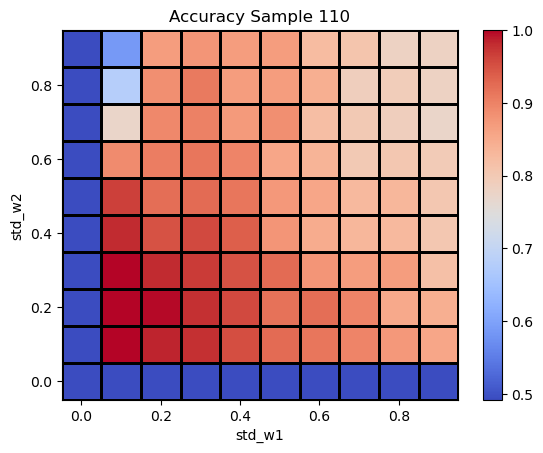

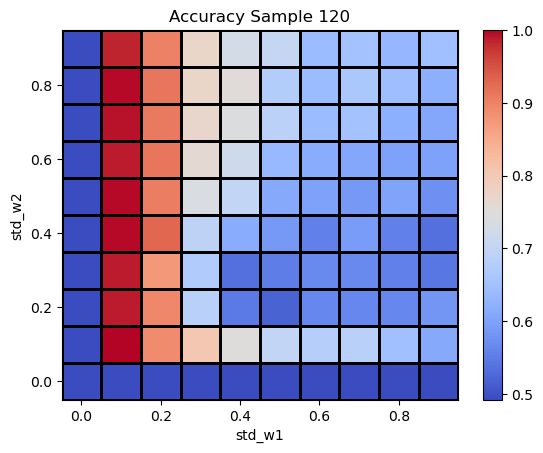

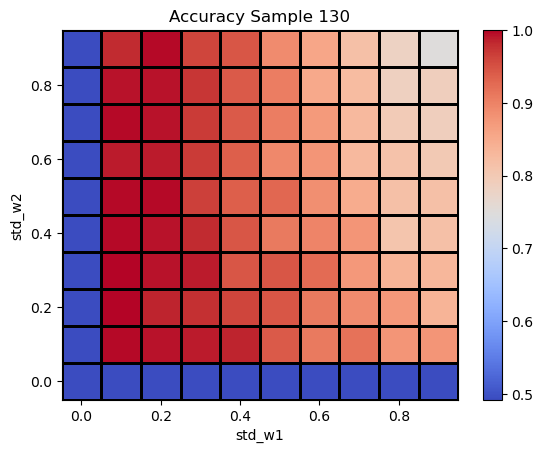

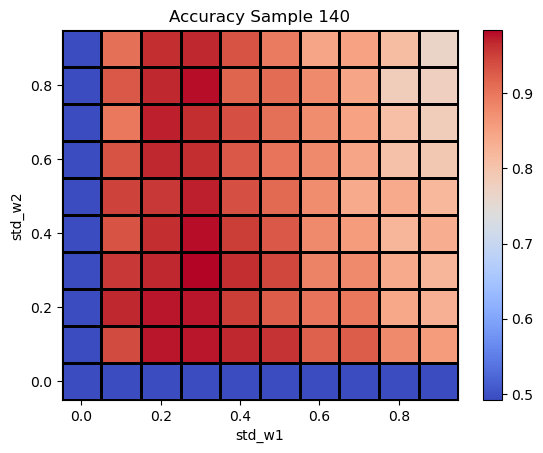

In [2]:
for (i,sample) in enumerate(sample_list):
    data = np.load(name_str.format(sample))
    fig = plt.figure()
    ax = plt.axes()
    b = ax.pcolormesh(axis_std_w1, axis_std_w2, data['accuracy_w1_w2'].T, cmap ='coolwarm', edgecolor='k')
    plt.colorbar(b)
    ax.set_xlabel('std_w1')
    ax.set_ylabel('std_w2')
    ax.set_title('Accuracy Sample {}'.format(sample))
    fig.savefig("input400=accuracy_w1_w2_sample{}.png".format(sample))
    for (j,std_w1) in enumerate(axis_std_w1):
        for (k,std_w2) in enumerate(axis_std_w2):
            accuracy_10_samples[i][j][k]= data['accuracy_w1_w2'][j][k]
    max_accuracy = np.max(accuracy_10_samples[i])
    index_max_accuracy = np.argmax(accuracy_10_samples[i])
    test_best_w1_w2 = np.unravel_index(index_max_accuracy, accuracy_10_samples[i].shape)
    test_best_w1_best_w2 = (np.array(test_best_w1_w2)+np.array([0.5,0.5]))*0.015+0.005
    print(max_accuracy)



In [3]:
average_accuracy_grid_10_by_10_10_samples = np.mean(accuracy_10_samples, axis=0)
std_dev_accuracy_grid_10_by_10_10_samples = np.std(accuracy_10_samples, axis=0)

In [4]:
average_accuracy_grid_10_by_10_10_samples

array([[0.4921875 , 0.4921875 , 0.4921875 , 0.4921875 , 0.4921875 ,
        0.4921875 , 0.4921875 , 0.4921875 , 0.4921875 , 0.4921875 ],
       [0.4921875 , 0.978125  , 0.98359375, 0.97773438, 0.97148437,
        0.97226563, 0.96328125, 0.94453125, 0.93710938, 0.91523438],
       [0.4921875 , 0.9796875 , 0.98007813, 0.97578125, 0.978125  ,
        0.97265625, 0.96953125, 0.96835938, 0.96640625, 0.96757812],
       [0.4921875 , 0.96796875, 0.95      , 0.95078125, 0.94609375,
        0.94375   , 0.9421875 , 0.94296875, 0.94492188, 0.93398437],
       [0.4921875 , 0.94882813, 0.91875   , 0.909375  , 0.91523438,
        0.91328125, 0.90976563, 0.90507812, 0.90664062, 0.90351563],
       [0.4921875 , 0.9265625 , 0.8953125 , 0.89023438, 0.87695312,
        0.87695312, 0.87304688, 0.87695312, 0.86875   , 0.86523438],
       [0.4921875 , 0.90429688, 0.87851563, 0.86445313, 0.85039062,
        0.8484375 , 0.83359375, 0.83671875, 0.83632812, 0.82851562],
       [0.4921875 , 0.8875    , 0.8617187

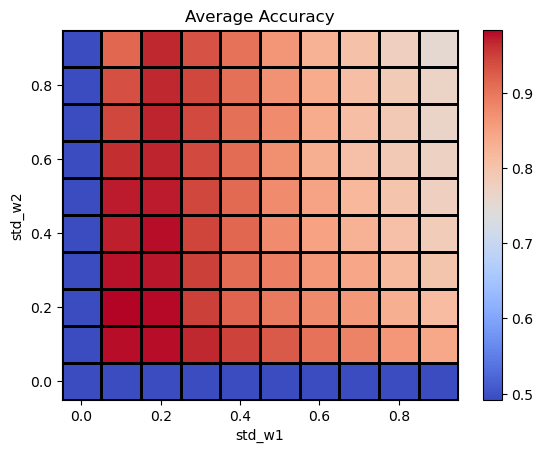

In [5]:
fig = plt.figure()
ax = plt.axes()
a = ax.pcolormesh(axis_std_w1, axis_std_w2, average_accuracy_grid_10_by_10_10_samples.T, cmap ='coolwarm', edgecolors='k')
plt.colorbar(a)
ax.set_xlabel('std_w1')
ax.set_ylabel('std_w2')
ax.set_title('Average Accuracy')


fig.savefig("average_accuracy_grid_400.png".format(sample))

0.98359375
0.4921875


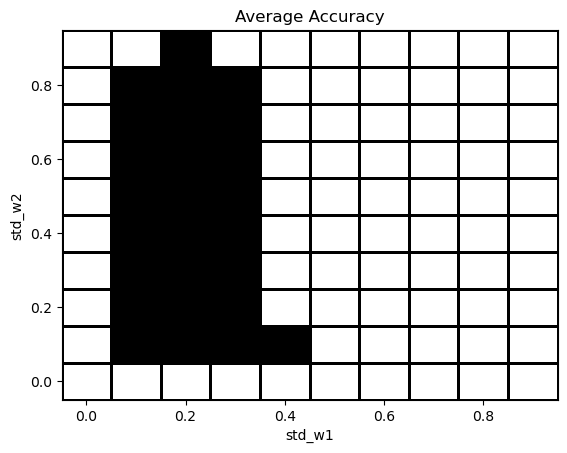

In [6]:
print(np.max(average_accuracy_grid_10_by_10_10_samples))
max_value=np.max(average_accuracy_grid_10_by_10_10_samples)
print(np.min(average_accuracy_grid_10_by_10_10_samples))
min_value=np.min(average_accuracy_grid_10_by_10_10_samples)
range_value=max_value-min_value
threshold=0.9
result_filter=average_accuracy_grid_10_by_10_10_samples >= threshold*range_value+min_value
fig = plt.figure()
ax = plt.axes()
a = ax.pcolormesh(axis_std_w1, axis_std_w2, result_filter.T, cmap ='binary', edgecolors='k')
ax.set_xlabel('std_w1')
ax.set_ylabel('std_w2')
ax.set_title('Average Accuracy')

fig.savefig("threshold=0.9_average_accuracy_input400.png")

(0.0, 1.0)

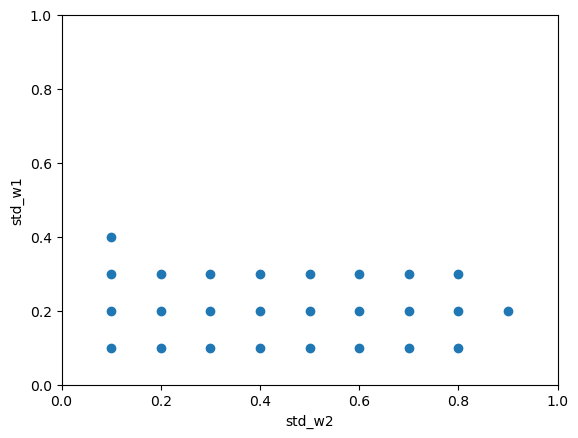

In [7]:
# get the indices where data is 1
x,y = np.argwhere(result_filter == 1).T

plt.scatter(y*0.1,x*0.1)
plt.xlabel("std_w2")
plt.ylabel("std_w1")
plt.xlim(0,1)
plt.ylim(0,1)



In [8]:
L_xx = np.sum((0.1*x)**2)-((np.sum(0.1*x))**2/x.size)

In [9]:
L_yy = np.sum((0.1*y)**2)-((np.sum(0.1*y))**2/y.size)

In [10]:
L_xy = np.sum(0.1*x*0.1*y) - ((np.sum(0.1*x))*(np.sum(0.1*y))/x.size)

In [11]:
r = L_xy/np.sqrt(L_xx*L_yy)

In [12]:
r

-0.12619564397569577

In [13]:
np.corrcoef(0.1*y,0.1*x)

array([[ 1.        , -0.12619564],
       [-0.12619564,  1.        ]])